# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS-109A Introduction to Data Science

## Lab 10:  Neural Networks using `keras` 

**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors:** Pavlos Protopapas and Kevin Rader<br/>
**Lab Instructor:** Eleni Kaxiras<br/>
**Authors:** David Sondak, Eleni Kaxiras, and Pavlos Protopapas

In [4]:
# ! python -m pip install --upgrade pip --user
# ! pip install tensorflow
# ! pip install keras

In [5]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get\
    ("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [6]:
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
%matplotlib inline

## Anatomy of an Artificial Neural Network

In a previous lab we created our own neural network by writing some simple python functions.  We focused on a regression problem where we tried to learn a function. We practiced using the logistic activation function in a network with multiple nodes, but a single or two hidden layers.  Some of the key observations were:
* Increasing the number of nodes allows us to represent more complicated functions  
* The weights and biases have a very big impact on the solution
* Finding the "correct" weights and biases is really hard to do manually
* There must be a better method for determining the weights and biases automatically

We also didn't assess the effects of different activation functions or different network depths. 

### The 3 parts of an ANN

- **Part 1: the input layer** (dimentions are determined from our dataset)
- **Part 2: the internal architecture or hidden layers** (the number of layers, the activation functions, the learnable parameters and other hyperparameters)
- **Part 3: the output layer** (what we want from the network)

### A word about .npy files

Numpy arrays are faster than plain python lists, as we know. Numpy also offers a file format called .npy, which, when it comes to reading the same data multiple times from disk storage, is a lot faster than reading from a csv file. You can save any list or array into this format.

In [8]:
np.save('123', np.array([[1, 2, 3], [4, 5, 6]]))
hello = np.load('123.npy')

In [9]:
hello

array([[1, 2, 3],
       [4, 5, 6]])

## `Keras` Basics ![](figs/keras.png)
https://keras.io/

Machine learning computations can be quite demanding. TensorFlow is a framework for representing complicated ML algorithms and executing them in any platform, from a phone to a distributed system using GPUs. Developed by Google Brain, TensorFlow is used very broadly today. 

**[`keras`](https://keras.io/)**, is a high-level API used for fast prototyping, advanced research, and production. We will use `tf.keras` which is TensorFlow's implementation of the `keras` API.

### Models are assemblies of layers

The core data structure of Keras is a **model**, a way to organize layers. A model is understood as a sequence or a graph of standalone, fully-configurable modules that can be plugged together with as few restrictions as possible. In particular, neural layers, cost functions, optimizers, initialization schemes, activation functions, regularization schemes are all standalone modules that you can combine to create new models.

The simplest type of model is the **Sequential** model, a linear stack of layers. For more complex architectures, one can use the Keras **Functional** API, which allows to build arbitrary graphs of layers.

https://keras.io/models/model/

Everything you need to know about the Sequential model is here: https://keras.io/models/sequential/

### Keras Installation

If you haven't already, install `Keras` using the instructions found at [https://keras.io/#installation](https://keras.io/#installation)

Choose the TensorFlow installation instructions (found at [https://www.tensorflow.org/install/](https://www.tensorflow.org/install/) ).

### Example: Approximating a Gaussian using keras
Let's try to redo the problem from last week.  Recall that we had a function

$$
\begin{aligned}
f\left(x\right) = e^{-x^{2}}
\end{aligned}
$$

and we wanted to use a neural network to approximate that function.  This week, we will use `keras` to do the true optimization.

First, we import the necessary `keras` modules.

In [10]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

print(tf.VERSION)
print(tf.keras.__version__)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.12.0
2.1.6-tf


In [11]:
# Checking if our machine has GPUs. Mine does not..
with tf.Session() as sess:
    devices = sess.list_devices()
    print(devices)

[_DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 268435456, 5076864472248868278)]


Before we get started, we need to create some **data**.  We will generate data points from an underlying function (here the Guassian).  Then we will use the `sklearn` `train_test_split` method to split the dataset into training and testing portions.  Remember that we train a machine learning algorithm on the training set and then assess the algorithm's performance on the test set.

In [12]:
from sklearn.model_selection import train_test_split

n_samples = 1050 # set the number of samples to take for each dataset
test_size = 0.3 # set the proportion of data to hold out for testing

# define the function and add noise

def f_gauss(x):
    return np.exp(-x * x) + np.random.normal(loc=0, scale=.1, size = x.shape[0])

X = np.random.permutation(np.linspace(-10, 10, n_samples)) # choose some points from the function
Y = f_gauss(X)

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

Let's plot the data

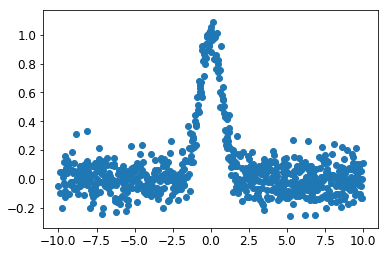

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X_train, Y_train)

### Building a keras network

Now we will create a neural network model with keras. We're going to use a single layer and just 2 neurons in that layer. We will start with the sigmoid activation function. We also choose a linear output layer since we are doing regression. The loss function is selected to be the **mean squared error (MSE)**. In addition to these choices we must also specify our initial weights as well as the optimization method that will be used to minimize the loss function. The keras interface has many choises as to those hyperparameters.

**Part 1:** First we start by defining the number of nodes in a layer and the input dimensions. If we have more than one layer we might need to define a value for the number of nodes (H) for each layer.

`H = 
input_dim =`

Then we instantiate the model

`model = models.Sequential() `

**Part 2:** Then we add the hidden layers. Adding layers and stacking them is done using `.add()`

`model.add(layers.Dense(H, input_dim=input_dim,  
                activation='sigmoid')) `

**An alternative way** 

`model = Sequential([
    Dense(200, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(4, activation='linear')
])`

**Part 3:** We end with the final layer (output)

`model.add(layers.Dense(1, 
                activation='linear')) `
                
Our model is not ready yet. We need to configure its learning process with .compile():

`model.compile(loss='mean_squared_error', optimizer='sgd')`

If you need to, you can further configure your optimizer. A core principle of Keras is to make things reasonably simple, while allowing the user to be fully in control when they need to (the ultimate control being the easy extensibility of the source code)

`model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01))`
              
Our model is now ready to use. We haven't trained it yet, but we'll do that now using the fit method. Notice that we also need to specify the batch size for the stochastic gradient decent algorithm as well as the number of epochs to run.

`model.fit(X_train, Y_train, batch_size=100, epochs=100)#, verbose=1)`

<div class="exercise"><b>Exercise 1:</b> </div>

Build a NN with one hidden layer with **2 neurons**. Use the `tanh` activation function. Train the model using the X_train dataset from above (train the model in this case means run `.compile` and `.fit`).

In [ ]:
# your code here
H = 2
input_dim = 1

model = models.Sequential()

model.add(layers.Dense(H, input_dim=input_dim, 
                      activation='tanh'))
model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear'))
model.compile(loss='mean_squared_error', optimizer='sgd')

model.fit(X_train, Y_train, batch_size=100, epochs=100)

In [23]:
# %load solutions/NN_1_layer_2_nodes.py
H = 2 # number of nodes in the layer
input_dim = 1 # input dimension: just x

model = models.Sequential() # create sequential multi-layer perceptron

# our first hidden layer
model.add(layers.Dense(H, input_dim=input_dim, 
                activation='tanh')) 
# layer 1
model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear')) 

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model_history = model.fit(X_train, Y_train, batch_size=100, epochs=100, verbose=1)


Epoch 1/100
735/735 [==============================] - 0s 423us/step - loss: 0.0695
Epoch 2/100
735/735 [==============================] - 0s 33us/step - loss: 0.0681
Epoch 3/100
735/735 [==============================] - 0s 38us/step - loss: 0.0668
Epoch 4/100
735/735 [==============================] - 0s 38us/step - loss: 0.0658
Epoch 5/100
735/735 [==============================] - 0s 33us/step - loss: 0.0650
Epoch 6/100
735/735 [==============================] - 0s 33us/step - loss: 0.0643
Epoch 7/100
735/735 [==============================] - 0s 33us/step - loss: 0.0636
Epoch 8/100
735/735 [==============================] - 0s 38us/step - loss: 0.0632
Epoch 9/100
735/735 [==============================] - 0s 38us/step - loss: 0.0628
Epoch 10/100
735/735 [==============================] - 0s 38us/step - loss: 0.0624
Epoch 11/100
735/735 [==============================] - 0s 33us/step - loss: 0.0620
Epoch 12/100
735/735 [==============================] - 0s 33us/step - loss: 0.0618


735/735 [==============================] - 0s 16us/step - loss: 0.0128
Epoch 99/100
735/735 [==============================] - 0s 11us/step - loss: 0.0126
Epoch 100/100
735/735 [==============================] - 0s 16us/step - loss: 0.0125


Great!  We've trained a model.  Now it's time to explore the results.  Notice the loss function.

In [24]:
# Some constants for our plots
FIG_SIZE = (10,5)
FONT_SIZE = 10
LABEL_SIZE = 15

In [25]:
# use our model to predict in the range we want
X_range = np.linspace(-10, 10, 1000)
y_pred = model.predict(X_range)

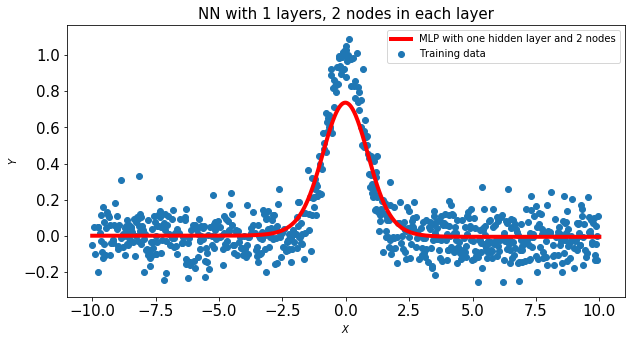

In [26]:
# Plot the results
fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label=f'MLP with one hidden layer and {H} nodes')
ax.set_xlabel(r'$X$', fontsize=FONT_SIZE)
ax.set_ylabel(r'$Y$', fontsize=FONT_SIZE)
ax.set_title(f'NN with {len(model_history.model.layers)-1} layers, {H} nodes in each layer', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=LABEL_SIZE)

ax.legend(loc=0, fontsize=FONT_SIZE)

plt.show()

<div class="exercise"><b>Exercise 2:</b></div>

Change the number of neurons in the layer. Try changing the activation function to `reLU`.  Can you get better results?  What worked the best?

In [29]:
# your code here


In [31]:
# %load solutions/NN_1_layer_16_nodes.py

H = 40 # number of nodes in the layer
input_dim = 1 # input dimension: just x

model2 = models.Sequential() # create sequential multi-layer perceptron

# layer 0, our hidden layer
model2.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='relu')) 
# layer 1
model2.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear')) 

# compile the model
model2.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model2_history = model2.fit(X_train, Y_train, batch_size=256, epochs=1200, verbose=1, \
                          shuffle = True, validation_split=0.5)


Train on 367 samples, validate on 368 samples
Epoch 1/1200
367/367 [==============================] - 0s 853us/step - loss: 0.0637 - val_loss: 0.0782
Epoch 2/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0622 - val_loss: 0.0767
Epoch 3/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0611 - val_loss: 0.0756
Epoch 4/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0604 - val_loss: 0.0748
Epoch 5/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0598 - val_loss: 0.0742
Epoch 6/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0593 - val_loss: 0.0737
Epoch 7/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0588 - val_loss: 0.0732
Epoch 8/1200
367/367 [==============================] - 0s 33us/step - loss: 0.0584 - val_loss: 0.0727
Epoch 9/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0579 - val_loss: 0.0722
Epoch 10/1200
367/367 [===

367/367 [==============================] - 0s 11us/step - loss: 0.0338 - val_loss: 0.0415
Epoch 80/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0338 - val_loss: 0.0412
Epoch 81/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0337 - val_loss: 0.0412
Epoch 82/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0335 - val_loss: 0.0414
Epoch 83/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0335 - val_loss: 0.0416
Epoch 84/1200
367/367 [==============================] - 0s 0us/step - loss: 0.0335 - val_loss: 0.0413
Epoch 85/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0334 - val_loss: 0.0409
Epoch 86/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0333 - val_loss: 0.0407
Epoch 87/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0332 - val_loss: 0.0407
Epoch 88/1200
367/367 [==============================] - 0s 11us/step - loss: 0

367/367 [==============================] - 0s 11us/step - loss: 0.0291 - val_loss: 0.0357
Epoch 158/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0291 - val_loss: 0.0354
Epoch 159/1200
367/367 [==============================] - 0s 33us/step - loss: 0.0289 - val_loss: 0.0352
Epoch 160/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0290 - val_loss: 0.0353
Epoch 161/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0291 - val_loss: 0.0352
Epoch 162/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0288 - val_loss: 0.0356
Epoch 163/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0290 - val_loss: 0.0359
Epoch 164/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0291 - val_loss: 0.0352
Epoch 165/1200
367/367 [==============================] - 0s 44us/step - loss: 0.0287 - val_loss: 0.0349
Epoch 166/1200
367/367 [==============================] - 0s 11us/step

367/367 [==============================] - 0s 11us/step - loss: 0.0258 - val_loss: 0.0317
Epoch 236/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0258 - val_loss: 0.0316
Epoch 237/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0258 - val_loss: 0.0318
Epoch 238/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0259 - val_loss: 0.0317
Epoch 239/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0258 - val_loss: 0.0315
Epoch 240/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0256 - val_loss: 0.0314
Epoch 241/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0257 - val_loss: 0.0315
Epoch 242/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0257 - val_loss: 0.0315
Epoch 243/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0255 - val_loss: 0.0315
Epoch 244/1200
367/367 [==============================] - 0s 22us/step

367/367 [==============================] - 0s 11us/step - loss: 0.0232 - val_loss: 0.0285
Epoch 314/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0231 - val_loss: 0.0283
Epoch 315/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0232 - val_loss: 0.0283
Epoch 316/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0231 - val_loss: 0.0284
Epoch 317/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0231 - val_loss: 0.0285
Epoch 318/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0230 - val_loss: 0.0283
Epoch 319/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0230 - val_loss: 0.0282
Epoch 320/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0230 - val_loss: 0.0283
Epoch 321/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0229 - val_loss: 0.0284
Epoch 322/1200
367/367 [==============================] - 0s 11us/step

367/367 [==============================] - 0s 22us/step - loss: 0.0208 - val_loss: 0.0258
Epoch 392/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0209 - val_loss: 0.0256
Epoch 393/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0210 - val_loss: 0.0255
Epoch 394/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0210 - val_loss: 0.0260
Epoch 395/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0210 - val_loss: 0.0260
Epoch 396/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0207 - val_loss: 0.0259
Epoch 397/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0208 - val_loss: 0.0259
Epoch 398/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0208 - val_loss: 0.0254
Epoch 399/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0207 - val_loss: 0.0256
Epoch 400/1200
367/367 [==============================] - 0s 11us/step

367/367 [==============================] - 0s 11us/step - loss: 0.0188 - val_loss: 0.0232
Epoch 470/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0188 - val_loss: 0.0232
Epoch 471/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0188 - val_loss: 0.0232
Epoch 472/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0187 - val_loss: 0.0232
Epoch 473/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0187 - val_loss: 0.0231
Epoch 474/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0187 - val_loss: 0.0230
Epoch 475/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0186 - val_loss: 0.0230
Epoch 476/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0186 - val_loss: 0.0230
Epoch 477/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0186 - val_loss: 0.0231
Epoch 478/1200
367/367 [==============================] - 0s 22us/step

367/367 [==============================] - 0s 22us/step - loss: 0.0170 - val_loss: 0.0215
Epoch 548/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0172 - val_loss: 0.0216
Epoch 549/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0171 - val_loss: 0.0209
Epoch 550/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0170 - val_loss: 0.0208
Epoch 551/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0170 - val_loss: 0.0209
Epoch 552/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0169 - val_loss: 0.0214
Epoch 553/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0170 - val_loss: 0.0211
Epoch 554/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0168 - val_loss: 0.0207
Epoch 555/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0169 - val_loss: 0.0207
Epoch 556/1200
367/367 [==============================] - 0s 11us/step

367/367 [==============================] - 0s 11us/step - loss: 0.0155 - val_loss: 0.0191
Epoch 626/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0155 - val_loss: 0.0191
Epoch 627/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0155 - val_loss: 0.0192
Epoch 628/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0154 - val_loss: 0.0190
Epoch 629/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0155 - val_loss: 0.0190
Epoch 630/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0154 - val_loss: 0.0193
Epoch 631/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0155 - val_loss: 0.0190
Epoch 632/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0154 - val_loss: 0.0188
Epoch 633/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0154 - val_loss: 0.0189
Epoch 634/1200
367/367 [==============================] - 0s 11us/step

367/367 [==============================] - 0s 11us/step - loss: 0.0143 - val_loss: 0.0174
Epoch 704/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0143 - val_loss: 0.0175
Epoch 705/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0142 - val_loss: 0.0177
Epoch 706/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0142 - val_loss: 0.0176
Epoch 707/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0142 - val_loss: 0.0173
Epoch 708/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0142 - val_loss: 0.0173
Epoch 709/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0142 - val_loss: 0.0175
Epoch 710/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0144 - val_loss: 0.0177
Epoch 711/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0142 - val_loss: 0.0172
Epoch 712/1200
367/367 [==============================] - 0s 11us/step

367/367 [==============================] - 0s 11us/step - loss: 0.0133 - val_loss: 0.0161
Epoch 782/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0133 - val_loss: 0.0161
Epoch 783/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0132 - val_loss: 0.0160
Epoch 784/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0132 - val_loss: 0.0160
Epoch 785/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0132 - val_loss: 0.0160
Epoch 786/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0132 - val_loss: 0.0161
Epoch 787/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0132 - val_loss: 0.0160
Epoch 788/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0131 - val_loss: 0.0159
Epoch 789/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0133 - val_loss: 0.0159
Epoch 790/1200
367/367 [==============================] - 0s 11us/step

367/367 [==============================] - 0s 11us/step - loss: 0.0124 - val_loss: 0.0149
Epoch 860/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0125 - val_loss: 0.0150
Epoch 861/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0124 - val_loss: 0.0153
Epoch 862/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0125 - val_loss: 0.0152
Epoch 863/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0124 - val_loss: 0.0149
Epoch 864/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0124 - val_loss: 0.0148
Epoch 865/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0124 - val_loss: 0.0150
Epoch 866/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0124 - val_loss: 0.0150
Epoch 867/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0124 - val_loss: 0.0149
Epoch 868/1200
367/367 [==============================] - 0s 22us/step

367/367 [==============================] - 0s 11us/step - loss: 0.0119 - val_loss: 0.0144
Epoch 938/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0120 - val_loss: 0.0140
Epoch 939/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0118 - val_loss: 0.0142
Epoch 940/1200
367/367 [==============================] - 0s 0us/step - loss: 0.0118 - val_loss: 0.0142
Epoch 941/1200
367/367 [==============================] - 0s 0us/step - loss: 0.0117 - val_loss: 0.0140
Epoch 942/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0118 - val_loss: 0.0139
Epoch 943/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0117 - val_loss: 0.0141
Epoch 944/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0119 - val_loss: 0.0142
Epoch 945/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0118 - val_loss: 0.0139
Epoch 946/1200
367/367 [==============================] - 0s 98us/step -

367/367 [==============================] - 0s 11us/step - loss: 0.0115 - val_loss: 0.0133
Epoch 1016/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0112 - val_loss: 0.0137
Epoch 1017/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0114 - val_loss: 0.0134
Epoch 1018/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0112 - val_loss: 0.0132
Epoch 1019/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0114 - val_loss: 0.0133
Epoch 1020/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0114 - val_loss: 0.0135
Epoch 1021/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0112 - val_loss: 0.0133
Epoch 1022/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0113 - val_loss: 0.0133
Epoch 1023/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0112 - val_loss: 0.0135
Epoch 1024/1200
367/367 [==============================] - 0s 

367/367 [==============================] - 0s 11us/step - loss: 0.0109 - val_loss: 0.0129
Epoch 1093/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0109 - val_loss: 0.0129
Epoch 1094/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0109 - val_loss: 0.0127
Epoch 1095/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0108 - val_loss: 0.0128
Epoch 1096/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0109 - val_loss: 0.0129
Epoch 1097/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0109 - val_loss: 0.0126
Epoch 1098/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0108 - val_loss: 0.0126
Epoch 1099/1200
367/367 [==============================] - 0s 33us/step - loss: 0.0108 - val_loss: 0.0126
Epoch 1100/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0108 - val_loss: 0.0127
Epoch 1101/1200
367/367 [==============================] - 0s 

367/367 [==============================] - 0s 12us/step - loss: 0.0106 - val_loss: 0.0126
Epoch 1170/1200
367/367 [==============================] - 0s 12us/step - loss: 0.0106 - val_loss: 0.0124
Epoch 1171/1200
367/367 [==============================] - 0s 12us/step - loss: 0.0105 - val_loss: 0.0121
Epoch 1172/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0106 - val_loss: 0.0121
Epoch 1173/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0106 - val_loss: 0.0122
Epoch 1174/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0105 - val_loss: 0.0126
Epoch 1175/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0106 - val_loss: 0.0122
Epoch 1176/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0107 - val_loss: 0.0121
Epoch 1177/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0105 - val_loss: 0.0123
Epoch 1178/1200
367/367 [==============================] - 0s 

Is the loss smaller now? You may access the results in a model by its `.history`

In [32]:
model2_history.history['loss'][-1]

0.01053534220518387

Again let's use the new model to predict:

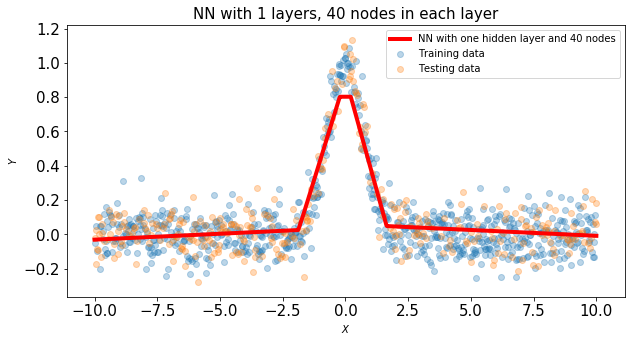

In [33]:
# use our model to predict in the range we want
X_range = np.linspace(-10, 10, 1000)
y_pred = model2.predict(X_range)

fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
ax.scatter(X_train, Y_train, label='Training data', alpha=0.3)
ax.scatter(X_test, Y_test, label='Testing data' , alpha=0.3)
ax.plot(X_range, y_pred, lw=4, color='r', label=f'NN with one hidden layer and {H} nodes')
ax.set_xlabel(r'$X$', fontsize=FONT_SIZE)
ax.set_ylabel(r'$Y$', fontsize=FONT_SIZE)
ax.set_title(f'NN with {len(model2_history.model.layers)-1} layers, {H} nodes in each layer', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=LABEL_SIZE)

ax.legend(loc=0, fontsize=FONT_SIZE)

plt.show()

<div class="exercise"><b>Exercise 3:</b>
</div>

Plot the loss function as a function of the epochs. <b>Hint:</b> You can access the loss function values with the command:`model_history.history['loss']`



In [ ]:
# your code here


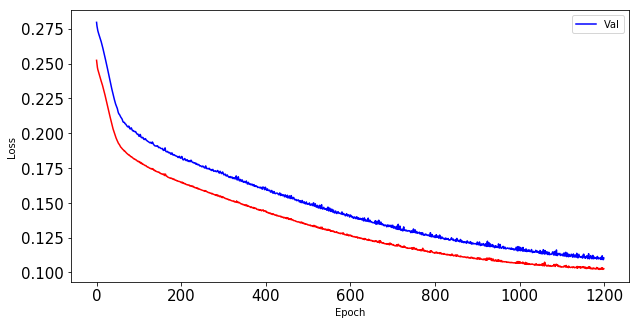

In [35]:
# %load solutions/print_history.py
fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
ax.plot(np.sqrt(model2_history.history['loss']), 'r')
ax.plot(np.sqrt(model2_history.history['val_loss']), 'b' ,label='Val')
ax.set_xlabel(r'Epoch', fontsize=FONT_SIZE)
ax.set_ylabel(r'Loss', fontsize=FONT_SIZE)
ax.legend()
ax.tick_params(labelsize=LABEL_SIZE)


How good is the model?  We can compute the $R^{2}$ score to get a sense of the model performance.

In [36]:
# evaluate the training and testing performance of your model 
# note: you should extract and check both the loss function and your evaluation metric
from sklearn.metrics import r2_score as r2

train_score = model.evaluate(X_train, Y_train, verbose=1)
print('Train loss:', train_score)
print('Train R2:', r2(Y_train, model.predict(X_train)))

test_score = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', test_score)
print('Test R2:', r2(Y_test, model.predict(X_test)))

735/735 [==============================] - 0s 125us/step
Train loss: 0.012401290595227358
Train R2: 0.8016549182866487
315/315 [==============================] - 0s 25us/step
Test loss: 0.013341756981043588
Test R2: 0.8006992954368132


<div class="exercise"><b>Exercise 4</b> </div>

Let's add more layers. Fix the width $H$ and fit a MLP network with <b>multiple</b> hidden layers, each with the same width. Start with logistic or hyperbolic-tan activation functions for the hidden nodes and linear activation for the output. Experiment with the number of layers and observe the effect of this on the quality of the fit.

In [ ]:
# your code here


In [38]:
# %load solutions/NN_10_layers_100_nodes.py

# number of hidden nodes
H =  100
# input dimension
input_dim = 1

# create sequential multi-layer perceptron
model3 = models.Sequential()

# Use a looping statement to write the code below
# layer 0
model3.add(layers.Dense(H, input_dim=input_dim,  
                activation='tanh')) 
# layer 1
model3.add(layers.Dense(H,
                activation='tanh')) 
# layer 2
model3.add(layers.Dense(H,
                activation='tanh')) 
# layer 3
model3.add(layers.Dense(H,  
                activation='tanh')) 
# layer 4
model3.add(layers.Dense(H,  
                activation='tanh')) 
# layer 5
model3.add(layers.Dense(H,  
                activation='tanh')) 
# layer 6
model3.add(layers.Dense(H,  
                activation='tanh'))
# layer 7
model3.add(layers.Dense(H,  
                activation='tanh'))
# layer 8
model3.add(layers.Dense(H,  
                activation='tanh'))
# layer 9
model3.add(layers.Dense(H,  
                activation='tanh'))
# layer 10 - output
model3.add(layers.Dense(1, 
                activation='linear')) 


In [39]:
# configure the model
model3.compile(loss='mean_squared_error', optimizer='adam')

In [40]:
# fit the model - INTENSIVE
model3_history = model3.fit(X_train, Y_train, batch_size=256, epochs=1500, verbose=1, \
                            shuffle = True, validation_split=0.3)

Train on 514 samples, validate on 221 samples
Epoch 1/1500
514/514 [==============================] - 1s 2ms/step - loss: 0.3535 - val_loss: 0.0689
Epoch 2/1500
514/514 [==============================] - 0s 29us/step - loss: 0.1081 - val_loss: 0.0747
Epoch 3/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0765 - val_loss: 0.0731
Epoch 4/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0667 - val_loss: 0.0919
Epoch 5/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0731 - val_loss: 0.0640
Epoch 6/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0535 - val_loss: 0.0615
Epoch 7/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0545 - val_loss: 0.0621
Epoch 8/1500
514/514 [==============================] - 0s 23us/step - loss: 0.0599 - val_loss: 0.0754
Epoch 9/1500
514/514 [==============================] - 0s 23us/step - loss: 0.0564 - val_loss: 0.0588
Epoch 10/1500
514/514 [=====

514/514 [==============================] - 0s 27us/step - loss: 0.0102 - val_loss: 0.0092
Epoch 80/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0100 - val_loss: 0.0102
Epoch 81/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0136 - val_loss: 0.0145
Epoch 82/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0144 - val_loss: 0.0120
Epoch 83/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0121 - val_loss: 0.0107
Epoch 84/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0106 - val_loss: 0.0154
Epoch 85/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0155 - val_loss: 0.0125
Epoch 86/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0113 - val_loss: 0.0103
Epoch 87/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0098 - val_loss: 0.0106
Epoch 88/1500
514/514 [==============================] - 0s 39us/step - loss: 

514/514 [==============================] - 0s 47us/step - loss: 0.0108 - val_loss: 0.0155
Epoch 158/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0126 - val_loss: 0.0138
Epoch 159/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0142 - val_loss: 0.0116
Epoch 160/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0108 - val_loss: 0.0149
Epoch 161/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0134 - val_loss: 0.0106
Epoch 162/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0123 - val_loss: 0.0123
Epoch 163/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0143 - val_loss: 0.0115
Epoch 164/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0135 - val_loss: 0.0107
Epoch 165/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0120 - val_loss: 0.0108
Epoch 166/1500
514/514 [==============================] - 0s 39us/step

514/514 [==============================] - 0s 39us/step - loss: 0.0121 - val_loss: 0.0116
Epoch 236/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0137 - val_loss: 0.0130
Epoch 237/1500
514/514 [==============================] - ETA: 0s - loss: 0.011 - 0s 39us/step - loss: 0.0156 - val_loss: 0.0251
Epoch 238/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0209 - val_loss: 0.0286
Epoch 239/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0224 - val_loss: 0.0192
Epoch 240/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0195 - val_loss: 0.0226
Epoch 241/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0224 - val_loss: 0.0105
Epoch 242/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0109 - val_loss: 0.0140
Epoch 243/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0161 - val_loss: 0.0211
Epoch 244/1500
514/514 [======================

Epoch 313/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0312 - val_loss: 0.0751
Epoch 314/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0556 - val_loss: 0.0784
Epoch 315/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0625 - val_loss: 0.0544
Epoch 316/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0532 - val_loss: 0.0225
Epoch 317/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0183 - val_loss: 0.0274
Epoch 318/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0263 - val_loss: 0.0254
Epoch 319/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0257 - val_loss: 0.0221
Epoch 320/1500
514/514 [==============================] - 0s 54us/step - loss: 0.0237 - val_loss: 0.0242
Epoch 321/1500
514/514 [==============================] - 0s 54us/step - loss: 0.0243 - val_loss: 0.0187
Epoch 322/1500
514/514 [==============================]

514/514 [==============================] - 0s 39us/step - loss: 0.0121 - val_loss: 0.0105
Epoch 392/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0111 - val_loss: 0.0095
Epoch 393/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0104 - val_loss: 0.0120
Epoch 394/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0111 - val_loss: 0.0092
Epoch 395/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0093 - val_loss: 0.0092
Epoch 396/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0095 - val_loss: 0.0124
Epoch 397/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0130 - val_loss: 0.0139
Epoch 398/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0127 - val_loss: 0.0104
Epoch 399/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0105 - val_loss: 0.0100
Epoch 400/1500
514/514 [==============================] - 0s 39us/step

514/514 [==============================] - 0s 47us/step - loss: 0.0162 - val_loss: 0.0140
Epoch 470/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0148 - val_loss: 0.0127
Epoch 471/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0139 - val_loss: 0.0157
Epoch 472/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0183 - val_loss: 0.0263
Epoch 473/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0293 - val_loss: 0.0229
Epoch 474/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0191 - val_loss: 0.0222
Epoch 475/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0194 - val_loss: 0.0275
Epoch 476/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0235 - val_loss: 0.0217
Epoch 477/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0230 - val_loss: 0.0233
Epoch 478/1500
514/514 [==============================] - 0s 39us/step

514/514 [==============================] - 0s 31us/step - loss: 0.0158 - val_loss: 0.0147
Epoch 548/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0124 - val_loss: 0.0156
Epoch 549/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0122 - val_loss: 0.0126
Epoch 550/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0104 - val_loss: 0.0109
Epoch 551/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0098 - val_loss: 0.0111
Epoch 552/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0136 - val_loss: 0.0160
Epoch 553/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0156 - val_loss: 0.0112
Epoch 554/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0106 - val_loss: 0.0154
Epoch 555/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0133 - val_loss: 0.0128
Epoch 556/1500
514/514 [==============================] - 0s 39us/step

Epoch 625/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0106 - val_loss: 0.0090
Epoch 626/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0094 - val_loss: 0.0095
Epoch 627/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0095 - val_loss: 0.0099
Epoch 628/1500
514/514 [==============================] - 0s 54us/step - loss: 0.0099 - val_loss: 0.0102
Epoch 629/1500
514/514 [==============================] - 0s 54us/step - loss: 0.0102 - val_loss: 0.0122
Epoch 630/1500
514/514 [==============================] - 0s 62us/step - loss: 0.0144 - val_loss: 0.0159
Epoch 631/1500
514/514 [==============================] - ETA: 0s - loss: 0.015 - 0s 47us/step - loss: 0.0150 - val_loss: 0.0125
Epoch 632/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0114 - val_loss: 0.0137
Epoch 633/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0129 - val_loss: 0.0129
Epoch 634/1500
514/514 [=======

Epoch 703/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0214 - val_loss: 0.0175
Epoch 704/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0175 - val_loss: 0.0280
Epoch 705/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0279 - val_loss: 0.0152
Epoch 706/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0189 - val_loss: 0.0133
Epoch 707/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0148 - val_loss: 0.0117
Epoch 708/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0143 - val_loss: 0.0110
Epoch 709/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0120 - val_loss: 0.0188
Epoch 710/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0171 - val_loss: 0.0120
Epoch 711/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0115 - val_loss: 0.0124
Epoch 712/1500
514/514 [==============================]

Epoch 781/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0191 - val_loss: 0.0114
Epoch 782/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0167 - val_loss: 0.0398
Epoch 783/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0555 - val_loss: 0.0493
Epoch 784/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0514 - val_loss: 0.0498
Epoch 785/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0538 - val_loss: 0.0551
Epoch 786/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0502 - val_loss: 0.0553
Epoch 787/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0483 - val_loss: 0.0432
Epoch 788/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0436 - val_loss: 0.0631
Epoch 789/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0795 - val_loss: 0.0362
Epoch 790/1500
514/514 [==============================]

514/514 [==============================] - 0s 39us/step - loss: 0.0132 - val_loss: 0.0103
Epoch 860/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0114 - val_loss: 0.0142
Epoch 861/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0162 - val_loss: 0.0185
Epoch 862/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0149 - val_loss: 0.0131
Epoch 863/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0123 - val_loss: 0.0145
Epoch 864/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0133 - val_loss: 0.0131
Epoch 865/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0124 - val_loss: 0.0115
Epoch 866/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0113 - val_loss: 0.0117
Epoch 867/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0122 - val_loss: 0.0122
Epoch 868/1500
514/514 [==============================] - 0s 39us/step

514/514 [==============================] - 0s 31us/step - loss: 0.0187 - val_loss: 0.0174
Epoch 938/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0167 - val_loss: 0.0126
Epoch 939/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0106 - val_loss: 0.0120
Epoch 940/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0121 - val_loss: 0.0129
Epoch 941/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0114 - val_loss: 0.0145
Epoch 942/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0122 - val_loss: 0.0151
Epoch 943/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0129 - val_loss: 0.0131
Epoch 944/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0114 - val_loss: 0.0112
Epoch 945/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0110 - val_loss: 0.0100
Epoch 946/1500
514/514 [==============================] - 0s 47us/step

Epoch 1015/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0154 - val_loss: 0.0161
Epoch 1016/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0148 - val_loss: 0.0118
Epoch 1017/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0128 - val_loss: 0.0112
Epoch 1018/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0136 - val_loss: 0.0109
Epoch 1019/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0128 - val_loss: 0.0104
Epoch 1020/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0112 - val_loss: 0.0110
Epoch 1021/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0110 - val_loss: 0.0104
Epoch 1022/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0104 - val_loss: 0.0109
Epoch 1023/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0101 - val_loss: 0.0124
Epoch 1024/1500
514/514 [=====================

514/514 [==============================] - 0s 62us/step - loss: 0.0266 - val_loss: 0.0292
Epoch 1093/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0254 - val_loss: 0.0259
Epoch 1094/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0206 - val_loss: 0.0181
Epoch 1095/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0148 - val_loss: 0.0157
Epoch 1096/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0161 - val_loss: 0.0125
Epoch 1097/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0130 - val_loss: 0.0192
Epoch 1098/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0186 - val_loss: 0.0232
Epoch 1099/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0189 - val_loss: 0.0255
Epoch 1100/1500
514/514 [==============================] - 0s 54us/step - loss: 0.0220 - val_loss: 0.0294
Epoch 1101/1500
514/514 [==============================] - 0s 

514/514 [==============================] - 0s 47us/step - loss: 0.0170 - val_loss: 0.0241
Epoch 1170/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0191 - val_loss: 0.0239
Epoch 1171/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0187 - val_loss: 0.0177
Epoch 1172/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0143 - val_loss: 0.0139
Epoch 1173/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0146 - val_loss: 0.0126
Epoch 1174/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0142 - val_loss: 0.0135
Epoch 1175/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0124 - val_loss: 0.0119
Epoch 1176/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0130 - val_loss: 0.0116
Epoch 1177/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0132 - val_loss: 0.0113
Epoch 1178/1500
514/514 [==============================] - 0s 

Epoch 1246/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0161 - val_loss: 0.0160
Epoch 1247/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0154 - val_loss: 0.0104
Epoch 1248/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0116 - val_loss: 0.0110
Epoch 1249/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0115 - val_loss: 0.0103
Epoch 1250/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0101 - val_loss: 0.0181
Epoch 1251/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0167 - val_loss: 0.0175
Epoch 1252/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0128 - val_loss: 0.0132
Epoch 1253/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0134 - val_loss: 0.0167
Epoch 1254/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0172 - val_loss: 0.0145
Epoch 1255/1500
514/514 [=====================

514/514 [==============================] - 0s 39us/step - loss: 0.0117 - val_loss: 0.0124
Epoch 1324/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0112 - val_loss: 0.0102
Epoch 1325/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0107 - val_loss: 0.0099
Epoch 1326/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0120 - val_loss: 0.0110
Epoch 1327/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0135 - val_loss: 0.0106
Epoch 1328/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0121 - val_loss: 0.0101
Epoch 1329/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0105 - val_loss: 0.0133
Epoch 1330/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0120 - val_loss: 0.0136
Epoch 1331/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0112 - val_loss: 0.0111
Epoch 1332/1500
514/514 [==============================] - 0s 

Epoch 1400/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0108 - val_loss: 0.0129
Epoch 1401/1500
514/514 [==============================] - 0s 31us/step - loss: 0.0112 - val_loss: 0.0138
Epoch 1402/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0120 - val_loss: 0.0129
Epoch 1403/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0150 - val_loss: 0.0245
Epoch 1404/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0256 - val_loss: 0.0266
Epoch 1405/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0247 - val_loss: 0.0234
Epoch 1406/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0193 - val_loss: 0.0268
Epoch 1407/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0214 - val_loss: 0.0305
Epoch 1408/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0260 - val_loss: 0.0337
Epoch 1409/1500
514/514 [=====================

514/514 [==============================] - 0s 39us/step - loss: 0.0117 - val_loss: 0.0103
Epoch 1478/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0096 - val_loss: 0.0121
Epoch 1479/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0111 - val_loss: 0.0154
Epoch 1480/1500
514/514 [==============================] - 0s 54us/step - loss: 0.0125 - val_loss: 0.0116
Epoch 1481/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0096 - val_loss: 0.0103
Epoch 1482/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0091 - val_loss: 0.0104
Epoch 1483/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0092 - val_loss: 0.0105
Epoch 1484/1500
514/514 [==============================] - 0s 54us/step - loss: 0.0094 - val_loss: 0.0105
Epoch 1485/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0094 - val_loss: 0.0101
Epoch 1486/1500
514/514 [==============================] - 0s 

In [41]:
len(model3_history.model.layers)

11

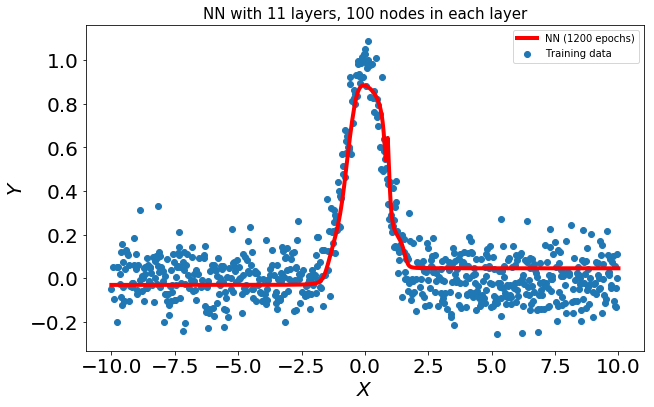

In [42]:
# use our model to predict in the range we want
num_epochs = f'{len(model2_history.epoch)}'

X_range = np.linspace(-10, 10, 500)
y_pred = model3.predict(X_range)

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label=f'NN ({num_epochs} epochs)')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title(f'NN with {len(model3_history.model.layers)} layers, {H} nodes in each layer', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=20)

ax.legend(loc=0)
plt.show()

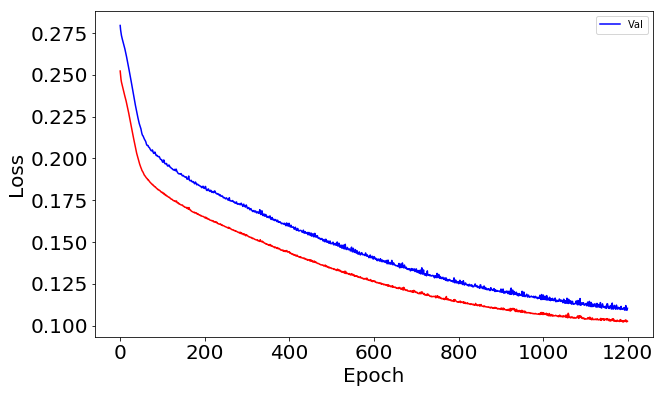

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model2_history.history['loss']), 'r')
ax.plot(np.sqrt(model2_history.history['val_loss']), 'b' ,label='Val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [44]:
# evaluate the training and testing performance of your model 
# note: you should extract and check both the loss function and your evaluation metric
score = model2.evaluate(X_train, Y_train, verbose=1)
print('Train loss:', score)
print('Train R2:', r2(Y_train, model2.predict(X_train)))

735/735 [==============================] - 0s 16us/step
Train loss: 0.011322496814944712
Train R2: 0.818909046860434


In [45]:
score = model2.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score)
print('Test R2:', r2(Y_test, model2.predict(X_test)))

315/315 [==============================] - 0s 13us/step
Test loss: 0.011951396028910365
Test R2: 0.8214686701532138


We got a better score this time.

### Overfitting the model



<div class="exercise"><b>Exercise 5</b> </div>

Usually we want to avoid overfitting of the data to our model. But here we want to achive overfitting! So we can regularize! There are a few reasons why a model overfits. One is the lack of data. So we will try to overfit by reducing the data. Try that with model3 and see if it overfits.

In [46]:
# Having very few points in our data
from sklearn.model_selection import train_test_split

In [47]:
n_samples = 50 # set the number of samples to take for each dataset
test_size = 0.3 # set the proportion of data to hold out for testing

# define the function and add noise

def f_gauss(x):
    return np.exp(-x * x) + np.random.normal(loc=0, scale=.1, size = x.shape[0])

X = np.random.permutation(np.linspace(-10, 10, n_samples)) # choose some points from the function
Y = f_gauss(X)

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

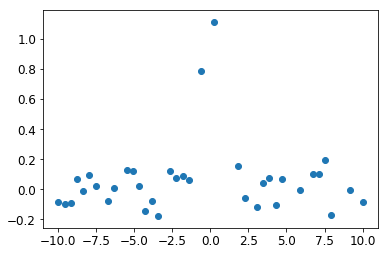

In [48]:
import matplotlib.pyplot as plt
plt.scatter(X_train, Y_train)

In [49]:
# number of hidden nodes
H =  100
# input dimension
input_dim = 1

# create sequential multi-layer perceptron
model4 = models.Sequential()
# layer 0
model4.add(layers.Dense(H, input_dim=input_dim,  
                activation='tanh')) 
# layer 1
model4.add(layers.Dense(H,
                activation='tanh')) 
# layer 2
model4.add(layers.Dense(H,
                activation='tanh')) 
# layer 3
model4.add(layers.Dense(H,  
                activation='tanh')) 
# layer 4
model4.add(layers.Dense(H,  
                activation='tanh')) 
# layer 5
model4.add(layers.Dense(H,  
                activation='tanh')) 
# layer 6
model4.add(layers.Dense(H,  
                activation='tanh'))
# layer 7
model4.add(layers.Dense(H,  
                activation='tanh'))
# layer 8
model4.add(layers.Dense(H,  
                activation='tanh'))
# layer 9
model4.add(layers.Dense(H,  
                activation='tanh'))
# layer 10 - output
model4.add(layers.Dense(1, 
                activation='linear')) 

In [50]:
# configure the model
model4.compile(loss='mean_squared_error', optimizer='adam')

In [51]:
# fit the model - INTENSIVE
model4_history = model4.fit(X_train, Y_train, batch_size=256, epochs=1500, verbose=1, \
                            shuffle = True, validation_split=0.2)

Train on 28 samples, validate on 7 samples
Epoch 1/1500
28/28 [==============================] - 1s 29ms/step - loss: 0.0826 - val_loss: 2.2811
Epoch 2/1500
28/28 [==============================] - 0s 0us/step - loss: 2.0405 - val_loss: 0.0863
Epoch 3/1500
28/28 [==============================] - 0s 0us/step - loss: 0.1419 - val_loss: 0.8414
Epoch 4/1500
28/28 [==============================] - 0s 142us/step - loss: 0.7215 - val_loss: 0.9357
Epoch 5/1500
28/28 [==============================] - 0s 143us/step - loss: 0.8161 - val_loss: 0.3726
Epoch 6/1500
28/28 [==============================] - 0s 143us/step - loss: 0.3607 - val_loss: 0.0290
Epoch 7/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0788 - val_loss: 0.0736
Epoch 8/1500
28/28 [==============================] - 0s 179us/step - loss: 0.1190 - val_loss: 0.2319
Epoch 9/1500
28/28 [==============================] - 0s 161us/step - loss: 0.2565 - val_loss: 0.2298
Epoch 10/1500
28/28 [=======================

Epoch 81/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0093 - val_loss: 0.0098
Epoch 82/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0093 - val_loss: 0.0094
Epoch 83/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0093 - val_loss: 0.0093
Epoch 84/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0093 - val_loss: 0.0093
Epoch 85/1500
28/28 [==============================] - 0s 144us/step - loss: 0.0093 - val_loss: 0.0095
Epoch 86/1500
28/28 [==============================] - 0s 285us/step - loss: 0.0092 - val_loss: 0.0098
Epoch 87/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0092 - val_loss: 0.0101
Epoch 88/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0092 - val_loss: 0.0102
Epoch 89/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0092 - val_loss: 0.0101
Epoch 90/1500
28/28 [==============================] - 0s 144us/step - lo

28/28 [==============================] - 0s 143us/step - loss: 0.0088 - val_loss: 0.0104
Epoch 161/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0088 - val_loss: 0.0104
Epoch 162/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0088 - val_loss: 0.0104
Epoch 163/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0088 - val_loss: 0.0104
Epoch 164/1500
28/28 [==============================] - 0s 0us/step - loss: 0.0088 - val_loss: 0.0104
Epoch 165/1500
28/28 [==============================] - 0s 0us/step - loss: 0.0088 - val_loss: 0.0104
Epoch 166/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0088 - val_loss: 0.0104
Epoch 167/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0088 - val_loss: 0.0104
Epoch 168/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0088 - val_loss: 0.0105
Epoch 169/1500
28/28 [==============================] - 0s 285us/step - loss: 0.008

Epoch 240/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0086 - val_loss: 0.0114
Epoch 241/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0086 - val_loss: 0.0114
Epoch 242/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0086 - val_loss: 0.0114
Epoch 243/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0086 - val_loss: 0.0114
Epoch 244/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0086 - val_loss: 0.0115
Epoch 245/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0086 - val_loss: 0.0115
Epoch 246/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0086 - val_loss: 0.0115
Epoch 247/1500
28/28 [==============================] - 0s 0us/step - loss: 0.0086 - val_loss: 0.0115
Epoch 248/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0086 - val_loss: 0.0115
Epoch 249/1500
28/28 [==============================] - 0s 285us/s

Epoch 319/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0083 - val_loss: 0.0133
Epoch 320/1500
28/28 [==============================] - 0s 142us/step - loss: 0.0083 - val_loss: 0.0134
Epoch 321/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0083 - val_loss: 0.0134
Epoch 322/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0083 - val_loss: 0.0134
Epoch 323/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0083 - val_loss: 0.0135
Epoch 324/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0082 - val_loss: 0.0135
Epoch 325/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0082 - val_loss: 0.0135
Epoch 326/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0082 - val_loss: 0.0136
Epoch 327/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0082 - val_loss: 0.0136
Epoch 328/1500
28/28 [==============================] - 0s 143us

Epoch 398/1500
28/28 [==============================] - 0s 142us/step - loss: 0.0078 - val_loss: 0.0161
Epoch 399/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0078 - val_loss: 0.0161
Epoch 400/1500
28/28 [==============================] - 0s 0us/step - loss: 0.0078 - val_loss: 0.0162
Epoch 401/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0078 - val_loss: 0.0162
Epoch 402/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0078 - val_loss: 0.0162
Epoch 403/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0078 - val_loss: 0.0163
Epoch 404/1500
28/28 [==============================] - 0s 285us/step - loss: 0.0078 - val_loss: 0.0163
Epoch 405/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0078 - val_loss: 0.0163
Epoch 406/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0078 - val_loss: 0.0164
Epoch 407/1500
28/28 [==============================] - 0s 143us/s

Epoch 477/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0073 - val_loss: 0.0185
Epoch 478/1500
28/28 [==============================] - 0s 142us/step - loss: 0.0073 - val_loss: 0.0185
Epoch 479/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0073 - val_loss: 0.0185
Epoch 480/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0073 - val_loss: 0.0185
Epoch 481/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0073 - val_loss: 0.0185
Epoch 482/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0073 - val_loss: 0.0186
Epoch 483/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0073 - val_loss: 0.0186
Epoch 484/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0073 - val_loss: 0.0186
Epoch 485/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0072 - val_loss: 0.0186
Epoch 486/1500
28/28 [==============================] - 0s 286us

Epoch 556/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0069 - val_loss: 0.0198
Epoch 557/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0069 - val_loss: 0.0198
Epoch 558/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0069 - val_loss: 0.0198
Epoch 559/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0069 - val_loss: 0.0198
Epoch 560/1500
28/28 [==============================] - 0s 285us/step - loss: 0.0069 - val_loss: 0.0198
Epoch 561/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0069 - val_loss: 0.0198
Epoch 562/1500
28/28 [==============================] - 0s 285us/step - loss: 0.0069 - val_loss: 0.0198
Epoch 563/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0069 - val_loss: 0.0198
Epoch 564/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0069 - val_loss: 0.0199
Epoch 565/1500
28/28 [==============================] - 0s 143us

Epoch 635/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0069 - val_loss: 0.0216
Epoch 636/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0119 - val_loss: 0.0188
Epoch 637/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0079 - val_loss: 0.0205
Epoch 638/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0096 - val_loss: 0.0170
Epoch 639/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0080 - val_loss: 0.0177
Epoch 640/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0089 - val_loss: 0.0171
Epoch 641/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0076 - val_loss: 0.0184
Epoch 642/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0087 - val_loss: 0.0155
Epoch 643/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0072 - val_loss: 0.0165
Epoch 644/1500
28/28 [==============================] - 0s 142us

Epoch 714/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0064 - val_loss: 0.0222
Epoch 715/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0064 - val_loss: 0.0222
Epoch 716/1500
28/28 [==============================] - 0s 142us/step - loss: 0.0064 - val_loss: 0.0222
Epoch 717/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0064 - val_loss: 0.0222
Epoch 718/1500
28/28 [==============================] - 0s 142us/step - loss: 0.0064 - val_loss: 0.0222
Epoch 719/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0064 - val_loss: 0.0222
Epoch 720/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0064 - val_loss: 0.0221
Epoch 721/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0064 - val_loss: 0.0221
Epoch 722/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0063 - val_loss: 0.0222
Epoch 723/1500
28/28 [==============================] - 0s 143us

Epoch 793/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0061 - val_loss: 0.0230
Epoch 794/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0061 - val_loss: 0.0230
Epoch 795/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0061 - val_loss: 0.0230
Epoch 796/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0061 - val_loss: 0.0230
Epoch 797/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0061 - val_loss: 0.0230
Epoch 798/1500
28/28 [==============================] - 0s 285us/step - loss: 0.0060 - val_loss: 0.0230
Epoch 799/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0060 - val_loss: 0.0230
Epoch 800/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0060 - val_loss: 0.0230
Epoch 801/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0060 - val_loss: 0.0230
Epoch 802/1500
28/28 [==============================] - 0s 143us

Epoch 872/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0058 - val_loss: 0.0230
Epoch 873/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0058 - val_loss: 0.0230
Epoch 874/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0058 - val_loss: 0.0230
Epoch 875/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0058 - val_loss: 0.0230
Epoch 876/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0058 - val_loss: 0.0230
Epoch 877/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0058 - val_loss: 0.0230
Epoch 878/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0058 - val_loss: 0.0230
Epoch 879/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0058 - val_loss: 0.0229
Epoch 880/1500
28/28 [==============================] - 0s 142us/step - loss: 0.0058 - val_loss: 0.0229
Epoch 881/1500
28/28 [==============================] - 0s 143us

Epoch 951/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0056 - val_loss: 0.0220
Epoch 952/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0056 - val_loss: 0.0220
Epoch 953/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0056 - val_loss: 0.0220
Epoch 954/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0056 - val_loss: 0.0220
Epoch 955/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0056 - val_loss: 0.0220
Epoch 956/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0056 - val_loss: 0.0219
Epoch 957/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0056 - val_loss: 0.0219
Epoch 958/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0056 - val_loss: 0.0219
Epoch 959/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0056 - val_loss: 0.0219
Epoch 960/1500
28/28 [==============================] - 0s 143us

Epoch 1030/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0053 - val_loss: 0.0200
Epoch 1031/1500
28/28 [==============================] - 0s 142us/step - loss: 0.0053 - val_loss: 0.0200
Epoch 1032/1500
28/28 [==============================] - 0s 142us/step - loss: 0.0053 - val_loss: 0.0199
Epoch 1033/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0053 - val_loss: 0.0199
Epoch 1034/1500
28/28 [==============================] - 0s 142us/step - loss: 0.0053 - val_loss: 0.0198
Epoch 1035/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0053 - val_loss: 0.0198
Epoch 1036/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0053 - val_loss: 0.0198
Epoch 1037/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0053 - val_loss: 0.0197
Epoch 1038/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0053 - val_loss: 0.0197
Epoch 1039/1500
28/28 [==============================] 

Epoch 1109/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0050 - val_loss: 0.0169
Epoch 1110/1500
28/28 [==============================] - 0s 144us/step - loss: 0.0050 - val_loss: 0.0169
Epoch 1111/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0050 - val_loss: 0.0169
Epoch 1112/1500
28/28 [==============================] - 0s 142us/step - loss: 0.0050 - val_loss: 0.0169
Epoch 1113/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0050 - val_loss: 0.0168
Epoch 1114/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0050 - val_loss: 0.0168
Epoch 1115/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0050 - val_loss: 0.0168
Epoch 1116/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0050 - val_loss: 0.0167
Epoch 1117/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0050 - val_loss: 0.0167
Epoch 1118/1500
28/28 [==============================] 

Epoch 1188/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0049 - val_loss: 0.0160
Epoch 1189/1500
28/28 [==============================] - 0s 142us/step - loss: 0.0049 - val_loss: 0.0160
Epoch 1190/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0049 - val_loss: 0.0160
Epoch 1191/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0049 - val_loss: 0.0160
Epoch 1192/1500
28/28 [==============================] - 0s 142us/step - loss: 0.0049 - val_loss: 0.0160
Epoch 1193/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0049 - val_loss: 0.0160
Epoch 1194/1500
28/28 [==============================] - 0s 142us/step - loss: 0.0049 - val_loss: 0.0160
Epoch 1195/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0049 - val_loss: 0.0160
Epoch 1196/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0049 - val_loss: 0.0160
Epoch 1197/1500
28/28 [==============================] 

Epoch 1267/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0046 - val_loss: 0.0157
Epoch 1268/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0046 - val_loss: 0.0157
Epoch 1269/1500
28/28 [==============================] - 0s 142us/step - loss: 0.0046 - val_loss: 0.0157
Epoch 1270/1500
28/28 [==============================] - 0s 142us/step - loss: 0.0046 - val_loss: 0.0157
Epoch 1271/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0046 - val_loss: 0.0157
Epoch 1272/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0046 - val_loss: 0.0157
Epoch 1273/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0046 - val_loss: 0.0157
Epoch 1274/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0046 - val_loss: 0.0157
Epoch 1275/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0046 - val_loss: 0.0157
Epoch 1276/1500
28/28 [==============================] 

28/28 [==============================] - 0s 143us/step - loss: 0.0039 - val_loss: 0.0172
Epoch 1346/1500
28/28 [==============================] - 0s 142us/step - loss: 0.0038 - val_loss: 0.0172
Epoch 1347/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0038 - val_loss: 0.0173
Epoch 1348/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0038 - val_loss: 0.0173
Epoch 1349/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0038 - val_loss: 0.0174
Epoch 1350/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0038 - val_loss: 0.0172
Epoch 1351/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0038 - val_loss: 0.0177
Epoch 1352/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0038 - val_loss: 0.0169
Epoch 1353/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0038 - val_loss: 0.0191
Epoch 1354/1500
28/28 [==============================] - 0s 143us/step 

Epoch 1424/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0051 - val_loss: 0.0155
Epoch 1425/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0051 - val_loss: 0.0154
Epoch 1426/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0051 - val_loss: 0.0153
Epoch 1427/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0051 - val_loss: 0.0152
Epoch 1428/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0051 - val_loss: 0.0153
Epoch 1429/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0051 - val_loss: 0.0153
Epoch 1430/1500
28/28 [==============================] - 0s 144us/step - loss: 0.0050 - val_loss: 0.0155
Epoch 1431/1500
28/28 [==============================] - 0s 0us/step - loss: 0.0050 - val_loss: 0.0157
Epoch 1432/1500
28/28 [==============================] - 0s 0us/step - loss: 0.0050 - val_loss: 0.0157
Epoch 1433/1500
28/28 [==============================] - 0s

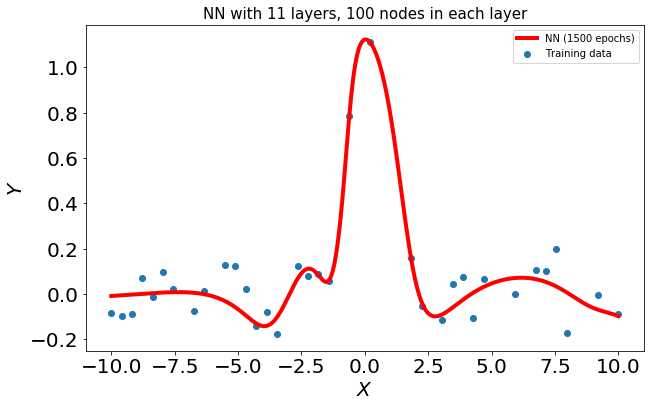

In [52]:
# use our model to predict in the range we want
num_epochs = f'{len(model4_history.epoch)}'

X_range = np.linspace(-10, 10, 500)
y_pred = model4.predict(X_range)

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label=f'NN ({num_epochs} epochs)')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title(f'NN with {len(model4_history.model.layers)} layers, {H} nodes in each layer', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=20)

ax.legend(loc=0)
plt.show()

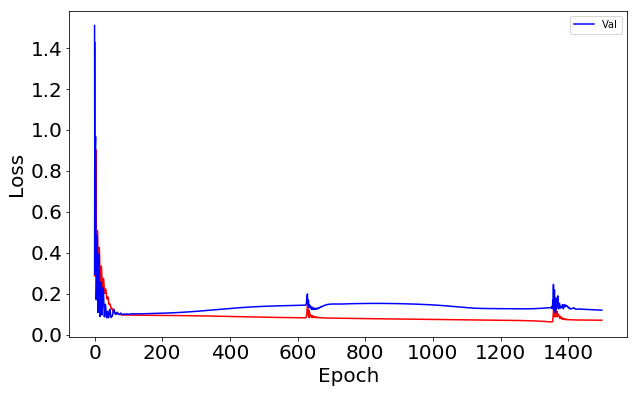

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model4_history.history['loss']), 'r')
ax.plot(np.sqrt(model4_history.history['val_loss']), 'b' ,label='Val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

### Regularization

Let's try adding a regularizer in our model: `kernel_regularizer=regularizers.l2(l2)`. Also let's create a function that takes the number of layers and the l2 value as the input and creates the model.

Usage: `def create_dense([10, 20], l2=0.01)` will create a model with two hidden layers of 10 and 20 nodes each, l2=0.01 regularization and num_classes output nodes. 

In [54]:
from keras import regularizers

Using TensorFlow backend.


In [55]:
H =  100  # number of hidden nodes
input_dim = 1

model5 = models.Sequential()

# Input layer of the neural network with ReLU activation function and L2 regularization
model5.add(layers.Dense(H, input_dim=input_dim,  
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
           
# hidden layers
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
# output layer
model5.add(layers.Dense(1, 
                activation='linear')) 

In [56]:
# configure the model
model5.compile(loss='mean_squared_error', optimizer='adam')

In [57]:
# fit the model - INTENSIVE
model5_history = model5.fit(X_train, Y_train, batch_size=256, epochs=1500, verbose=1, \
                            shuffle = True, validation_split=0.2)

Train on 28 samples, validate on 7 samples
Epoch 1/1500
28/28 [==============================] - 1s 41ms/step - loss: 6.2273 - val_loss: 6.6694
Epoch 2/1500
28/28 [==============================] - 0s 558us/step - loss: 6.5881 - val_loss: 6.0715
Epoch 3/1500
28/28 [==============================] - 0s 0us/step - loss: 6.1120 - val_loss: 5.9957
Epoch 4/1500
28/28 [==============================] - 0s 0us/step - loss: 6.0308 - val_loss: 6.1957
Epoch 5/1500
28/28 [==============================] - 0s 0us/step - loss: 6.1765 - val_loss: 6.0645
Epoch 6/1500
28/28 [==============================] - 0s 0us/step - loss: 6.0719 - val_loss: 5.8672
Epoch 7/1500
28/28 [==============================] - 0s 0us/step - loss: 5.9174 - val_loss: 5.8389
Epoch 8/1500
28/28 [==============================] - 0s 143us/step - loss: 5.8928 - val_loss: 5.9039
Epoch 9/1500
28/28 [==============================] - 0s 142us/step - loss: 5.9376 - val_loss: 5.8825
Epoch 10/1500
28/28 [=============================

Epoch 81/1500
28/28 [==============================] - 0s 143us/step - loss: 3.6076 - val_loss: 3.5526
Epoch 82/1500
28/28 [==============================] - 0s 143us/step - loss: 3.5812 - val_loss: 3.5264
Epoch 83/1500
28/28 [==============================] - 0s 143us/step - loss: 3.5549 - val_loss: 3.5006
Epoch 84/1500
28/28 [==============================] - 0s 143us/step - loss: 3.5288 - val_loss: 3.4752
Epoch 85/1500
28/28 [==============================] - 0s 143us/step - loss: 3.5028 - val_loss: 3.4501
Epoch 86/1500
28/28 [==============================] - 0s 286us/step - loss: 3.4770 - val_loss: 3.4252
Epoch 87/1500
28/28 [==============================] - 0s 142us/step - loss: 3.4515 - val_loss: 3.4003
Epoch 88/1500
28/28 [==============================] - 0s 143us/step - loss: 3.4261 - val_loss: 3.3752
Epoch 89/1500
28/28 [==============================] - 0s 143us/step - loss: 3.4008 - val_loss: 3.3503
Epoch 90/1500
28/28 [==============================] - 0s 143us/step - lo

28/28 [==============================] - 0s 143us/step - loss: 2.0251 - val_loss: 1.9952
Epoch 161/1500
28/28 [==============================] - 0s 286us/step - loss: 2.0107 - val_loss: 1.9810
Epoch 162/1500
28/28 [==============================] - 0s 143us/step - loss: 1.9965 - val_loss: 1.9669
Epoch 163/1500
28/28 [==============================] - 0s 143us/step - loss: 1.9824 - val_loss: 1.9529
Epoch 164/1500
28/28 [==============================] - 0s 143us/step - loss: 1.9683 - val_loss: 1.9390
Epoch 165/1500
28/28 [==============================] - 0s 143us/step - loss: 1.9544 - val_loss: 1.9252
Epoch 166/1500
28/28 [==============================] - 0s 143us/step - loss: 1.9406 - val_loss: 1.9116
Epoch 167/1500
28/28 [==============================] - 0s 0us/step - loss: 1.9269 - val_loss: 1.8980
Epoch 168/1500
28/28 [==============================] - 0s 142us/step - loss: 1.9134 - val_loss: 1.8846
Epoch 169/1500
28/28 [==============================] - 0s 143us/step - loss: 1.8

Epoch 240/1500
28/28 [==============================] - 0s 0us/step - loss: 1.1732 - val_loss: 1.1515
Epoch 241/1500
28/28 [==============================] - 0s 0us/step - loss: 1.1656 - val_loss: 1.1439
Epoch 242/1500
28/28 [==============================] - 0s 143us/step - loss: 1.1581 - val_loss: 1.1365
Epoch 243/1500
28/28 [==============================] - 0s 0us/step - loss: 1.1506 - val_loss: 1.1291
Epoch 244/1500
28/28 [==============================] - 0s 0us/step - loss: 1.1432 - val_loss: 1.1217
Epoch 245/1500
28/28 [==============================] - 0s 0us/step - loss: 1.1358 - val_loss: 1.1144
Epoch 246/1500
28/28 [==============================] - 0s 143us/step - loss: 1.1285 - val_loss: 1.1071
Epoch 247/1500
28/28 [==============================] - 0s 232us/step - loss: 1.1212 - val_loss: 1.0999
Epoch 248/1500
28/28 [==============================] - 0s 107us/step - loss: 1.1140 - val_loss: 1.0928
Epoch 249/1500
28/28 [==============================] - 0s 125us/step - lo

Epoch 319/1500
28/28 [==============================] - 0s 142us/step - loss: 0.7195 - val_loss: 0.7020
Epoch 320/1500
28/28 [==============================] - 0s 0us/step - loss: 0.7153 - val_loss: 0.6979
Epoch 321/1500
28/28 [==============================] - 0s 0us/step - loss: 0.7111 - val_loss: 0.6937
Epoch 322/1500
28/28 [==============================] - 0s 0us/step - loss: 0.7069 - val_loss: 0.6896
Epoch 323/1500
28/28 [==============================] - 0s 143us/step - loss: 0.7028 - val_loss: 0.6855
Epoch 324/1500
28/28 [==============================] - 0s 143us/step - loss: 0.6987 - val_loss: 0.6815
Epoch 325/1500
28/28 [==============================] - 0s 0us/step - loss: 0.6947 - val_loss: 0.6775
Epoch 326/1500
28/28 [==============================] - 0s 143us/step - loss: 0.6906 - val_loss: 0.6735
Epoch 327/1500
28/28 [==============================] - 0s 143us/step - loss: 0.6866 - val_loss: 0.6695
Epoch 328/1500
28/28 [==============================] - 0s 143us/step - 

Epoch 399/1500
28/28 [==============================] - 0s 143us/step - loss: 0.4609 - val_loss: 0.4466
Epoch 400/1500
28/28 [==============================] - 0s 143us/step - loss: 0.4585 - val_loss: 0.4442
Epoch 401/1500
28/28 [==============================] - 0s 143us/step - loss: 0.4561 - val_loss: 0.4419
Epoch 402/1500
28/28 [==============================] - 0s 143us/step - loss: 0.4537 - val_loss: 0.4395
Epoch 403/1500
28/28 [==============================] - 0s 143us/step - loss: 0.4514 - val_loss: 0.4372
Epoch 404/1500
28/28 [==============================] - 0s 143us/step - loss: 0.4490 - val_loss: 0.4349
Epoch 405/1500
28/28 [==============================] - 0s 143us/step - loss: 0.4467 - val_loss: 0.4326
Epoch 406/1500
28/28 [==============================] - 0s 143us/step - loss: 0.4444 - val_loss: 0.4303
Epoch 407/1500
28/28 [==============================] - 0s 286us/step - loss: 0.4421 - val_loss: 0.4280
Epoch 408/1500
28/28 [==============================] - 0s 143us

Epoch 478/1500
28/28 [==============================] - 0s 143us/step - loss: 0.3124 - val_loss: 0.3005
Epoch 479/1500
28/28 [==============================] - 0s 143us/step - loss: 0.3110 - val_loss: 0.2991
Epoch 480/1500
28/28 [==============================] - 0s 0us/step - loss: 0.3096 - val_loss: 0.2977
Epoch 481/1500
28/28 [==============================] - 0s 143us/step - loss: 0.3082 - val_loss: 0.2963
Epoch 482/1500
28/28 [==============================] - 0s 143us/step - loss: 0.3068 - val_loss: 0.2950
Epoch 483/1500
28/28 [==============================] - 0s 143us/step - loss: 0.3054 - val_loss: 0.2936
Epoch 484/1500
28/28 [==============================] - 0s 143us/step - loss: 0.3040 - val_loss: 0.2922
Epoch 485/1500
28/28 [==============================] - 0s 0us/step - loss: 0.3026 - val_loss: 0.2909
Epoch 486/1500
28/28 [==============================] - 0s 0us/step - loss: 0.3013 - val_loss: 0.2896
Epoch 487/1500
28/28 [==============================] - 0s 143us/step 

Epoch 557/1500
28/28 [==============================] - 0s 143us/step - loss: 0.2244 - val_loss: 0.2139
Epoch 558/1500
28/28 [==============================] - 0s 286us/step - loss: 0.2235 - val_loss: 0.2130
Epoch 559/1500
28/28 [==============================] - 0s 142us/step - loss: 0.2227 - val_loss: 0.2122
Epoch 560/1500
28/28 [==============================] - 0s 143us/step - loss: 0.2218 - val_loss: 0.2114
Epoch 561/1500
28/28 [==============================] - 0s 143us/step - loss: 0.2210 - val_loss: 0.2105
Epoch 562/1500
28/28 [==============================] - 0s 143us/step - loss: 0.2202 - val_loss: 0.2097
Epoch 563/1500
28/28 [==============================] - 0s 142us/step - loss: 0.2193 - val_loss: 0.2089
Epoch 564/1500
28/28 [==============================] - 0s 286us/step - loss: 0.2185 - val_loss: 0.2081
Epoch 565/1500
28/28 [==============================] - 0s 143us/step - loss: 0.2177 - val_loss: 0.2073
Epoch 566/1500
28/28 [==============================] - 0s 143us

Epoch 636/1500
28/28 [==============================] - 0s 142us/step - loss: 0.1716 - val_loss: 0.1618
Epoch 637/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1711 - val_loss: 0.1613
Epoch 638/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1706 - val_loss: 0.1608
Epoch 639/1500
28/28 [==============================] - 0s 144us/step - loss: 0.1701 - val_loss: 0.1603
Epoch 640/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1696 - val_loss: 0.1598
Epoch 641/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1691 - val_loss: 0.1593
Epoch 642/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1686 - val_loss: 0.1589
Epoch 643/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1681 - val_loss: 0.1584
Epoch 644/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1676 - val_loss: 0.1579
Epoch 645/1500
28/28 [==============================] - 0s 143us

Epoch 715/1500
28/28 [==============================] - 0s 142us/step - loss: 0.1396 - val_loss: 0.1303
Epoch 716/1500
28/28 [==============================] - 0s 286us/step - loss: 0.1393 - val_loss: 0.1300
Epoch 717/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1390 - val_loss: 0.1297
Epoch 718/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1387 - val_loss: 0.1294
Epoch 719/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1384 - val_loss: 0.1291
Epoch 720/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1381 - val_loss: 0.1288
Epoch 721/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1378 - val_loss: 0.1285
Epoch 722/1500
28/28 [==============================] - 0s 286us/step - loss: 0.1374 - val_loss: 0.1282
Epoch 723/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1371 - val_loss: 0.1279
Epoch 724/1500
28/28 [==============================] - 0s 143us

Epoch 794/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1198 - val_loss: 0.1110
Epoch 795/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1196 - val_loss: 0.1108
Epoch 796/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1194 - val_loss: 0.1106
Epoch 797/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1192 - val_loss: 0.1104
Epoch 798/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1191 - val_loss: 0.1102
Epoch 799/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1189 - val_loss: 0.1101
Epoch 800/1500
28/28 [==============================] - 0s 142us/step - loss: 0.1187 - val_loss: 0.1099
Epoch 801/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1185 - val_loss: 0.1097
Epoch 802/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1183 - val_loss: 0.1095
Epoch 803/1500
28/28 [==============================] - 0s 143us

Epoch 873/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1074 - val_loss: 0.0990
Epoch 874/1500
28/28 [==============================] - 0s 286us/step - loss: 0.1072 - val_loss: 0.0989
Epoch 875/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1071 - val_loss: 0.0988
Epoch 876/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1070 - val_loss: 0.0987
Epoch 877/1500
28/28 [==============================] - 0s 286us/step - loss: 0.1069 - val_loss: 0.0986
Epoch 878/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1067 - val_loss: 0.0984
Epoch 879/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1066 - val_loss: 0.0983
Epoch 880/1500
28/28 [==============================] - 0s 285us/step - loss: 0.1065 - val_loss: 0.0982
Epoch 881/1500
28/28 [==============================] - 0s 143us/step - loss: 0.1064 - val_loss: 0.0981
Epoch 882/1500
28/28 [==============================] - 0s 143us

Epoch 952/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0992 - val_loss: 0.0915
Epoch 953/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0991 - val_loss: 0.0914
Epoch 954/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0990 - val_loss: 0.0914
Epoch 955/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0990 - val_loss: 0.0913
Epoch 956/1500
28/28 [==============================] - 0s 142us/step - loss: 0.0989 - val_loss: 0.0912
Epoch 957/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0988 - val_loss: 0.0911
Epoch 958/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0987 - val_loss: 0.0911
Epoch 959/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0986 - val_loss: 0.0910
Epoch 960/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0986 - val_loss: 0.0909
Epoch 961/1500
28/28 [==============================] - 0s 143us

Epoch 1031/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0936 - val_loss: 0.0867
Epoch 1032/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0936 - val_loss: 0.0867
Epoch 1033/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0935 - val_loss: 0.0866
Epoch 1034/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0934 - val_loss: 0.0866
Epoch 1035/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0934 - val_loss: 0.0865
Epoch 1036/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0933 - val_loss: 0.0865
Epoch 1037/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0933 - val_loss: 0.0864
Epoch 1038/1500
28/28 [==============================] - 0s 285us/step - loss: 0.0932 - val_loss: 0.0864
Epoch 1039/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0931 - val_loss: 0.0863
Epoch 1040/1500
28/28 [==============================] 

Epoch 1110/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0896 - val_loss: 0.0836
Epoch 1111/1500
28/28 [==============================] - 0s 144us/step - loss: 0.0896 - val_loss: 0.0836
Epoch 1112/1500
28/28 [==============================] - 0s 142us/step - loss: 0.0896 - val_loss: 0.0835
Epoch 1113/1500
28/28 [==============================] - 0s 142us/step - loss: 0.0895 - val_loss: 0.0835
Epoch 1114/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0895 - val_loss: 0.0835
Epoch 1115/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0894 - val_loss: 0.0835
Epoch 1116/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0894 - val_loss: 0.0834
Epoch 1117/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0894 - val_loss: 0.0834
Epoch 1118/1500
28/28 [==============================] - 0s 142us/step - loss: 0.0893 - val_loss: 0.0834
Epoch 1119/1500
28/28 [==============================] 

Epoch 1189/1500
28/28 [==============================] - 0s 142us/step - loss: 0.0869 - val_loss: 0.0816
Epoch 1190/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0869 - val_loss: 0.0816
Epoch 1191/1500
28/28 [==============================] - 0s 285us/step - loss: 0.0869 - val_loss: 0.0816
Epoch 1192/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0869 - val_loss: 0.0816
Epoch 1193/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0868 - val_loss: 0.0815
Epoch 1194/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0868 - val_loss: 0.0815
Epoch 1195/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0868 - val_loss: 0.0815
Epoch 1196/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0868 - val_loss: 0.0815
Epoch 1197/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0867 - val_loss: 0.0815
Epoch 1198/1500
28/28 [==============================] 

Epoch 1268/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0852 - val_loss: 0.0803
Epoch 1269/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0852 - val_loss: 0.0803
Epoch 1270/1500
28/28 [==============================] - 0s 142us/step - loss: 0.0851 - val_loss: 0.0803
Epoch 1271/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0851 - val_loss: 0.0803
Epoch 1272/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0851 - val_loss: 0.0803
Epoch 1273/1500
28/28 [==============================] - 0s 0us/step - loss: 0.0851 - val_loss: 0.0803
Epoch 1274/1500
28/28 [==============================] - 0s 142us/step - loss: 0.0851 - val_loss: 0.0802
Epoch 1275/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0851 - val_loss: 0.0802
Epoch 1276/1500
28/28 [==============================] - 0s 142us/step - loss: 0.0850 - val_loss: 0.0802
Epoch 1277/1500
28/28 [==============================] - 

Epoch 1347/1500
28/28 [==============================] - 0s 142us/step - loss: 0.0840 - val_loss: 0.0794
Epoch 1348/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0840 - val_loss: 0.0794
Epoch 1349/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0840 - val_loss: 0.0794
Epoch 1350/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0840 - val_loss: 0.0794
Epoch 1351/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0840 - val_loss: 0.0794
Epoch 1352/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0840 - val_loss: 0.0794
Epoch 1353/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0839 - val_loss: 0.0794
Epoch 1354/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0839 - val_loss: 0.0794
Epoch 1355/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0839 - val_loss: 0.0794
Epoch 1356/1500
28/28 [==============================] 

Epoch 1426/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0832 - val_loss: 0.0788
Epoch 1427/1500
28/28 [==============================] - 0s 0us/step - loss: 0.0832 - val_loss: 0.0788
Epoch 1428/1500
28/28 [==============================] - 0s 0us/step - loss: 0.0832 - val_loss: 0.0788
Epoch 1429/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0832 - val_loss: 0.0788
Epoch 1430/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0832 - val_loss: 0.0788
Epoch 1431/1500
28/28 [==============================] - 0s 286us/step - loss: 0.0832 - val_loss: 0.0788
Epoch 1432/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0832 - val_loss: 0.0788
Epoch 1433/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0831 - val_loss: 0.0788
Epoch 1434/1500
28/28 [==============================] - 0s 143us/step - loss: 0.0831 - val_loss: 0.0788
Epoch 1435/1500
28/28 [==============================] - 0s

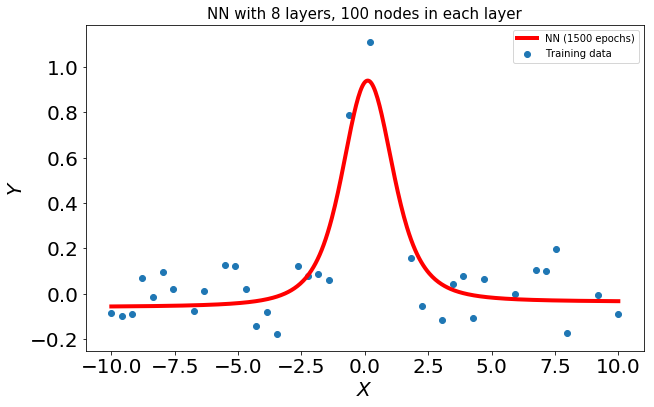

In [58]:
# use our model to predict in the range we want
num_epochs = f'{len(model5_history.epoch)}'

X_range = np.linspace(-10, 10, 500)
y_pred = model5.predict(X_range)

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label=f'NN ({num_epochs} epochs)')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title(f'NN with {len(model5_history.model.layers)} layers, {H} nodes in each layer', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=20)

ax.legend(loc=0)
plt.show()

That seems very good. Let's see the $R^2$

In [59]:
from sklearn.metrics import r2_score as r2

In [60]:
score = model5.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score)
print('Test R2:', r2(Y_test, model5.predict(X_test)))

15/15 [==============================] - 0s 0us/step
Test loss: 0.08376505225896835
Test R2: 0.8739446439144187


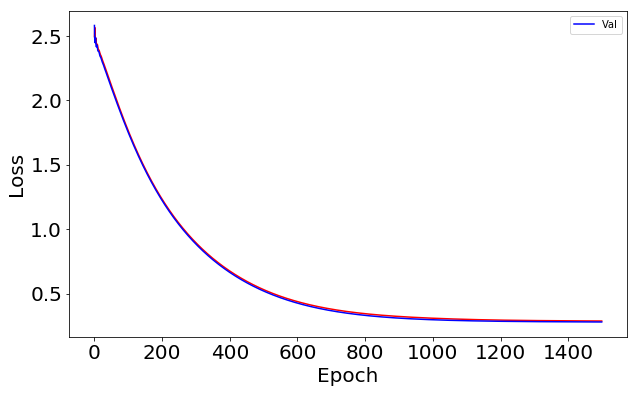

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model5_history.history['loss']), 'r')
ax.plot(np.sqrt(model5_history.history['val_loss']), 'b' ,label='Val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)